In [1]:
#importing all the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [2]:
#dataset
diabetes = pd.read_csv('Diabetes Database.csv')

In [3]:
#description of the dataset
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#finding the number of missing values
db_dat_copy = diabetes.copy(deep = True)
db_dat_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = db_dat_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(db_dat_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [5]:
#visualization of the outlier in the data


<AxesSubplot:xlabel='Pregnancies'>

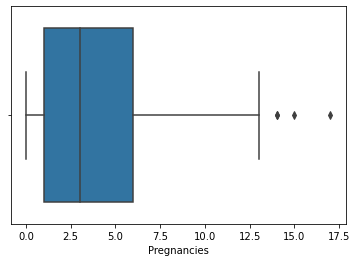

In [6]:
sns.boxplot(x=diabetes["Pregnancies"])

<AxesSubplot:xlabel='Glucose'>

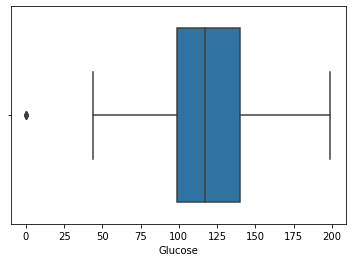

In [7]:
sns.boxplot(x=diabetes["Glucose"])

<AxesSubplot:xlabel='BloodPressure'>

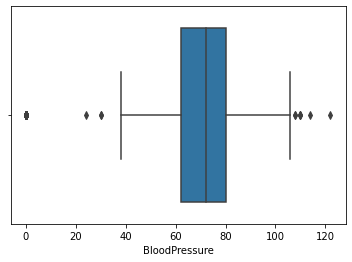

In [8]:
sns.boxplot(x=diabetes['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness'>

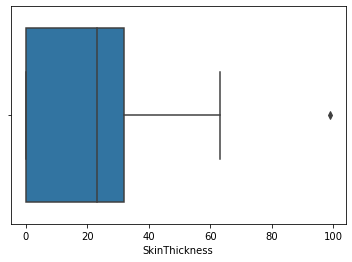

In [9]:
sns.boxplot(x=diabetes['SkinThickness'])

<AxesSubplot:xlabel='Insulin'>

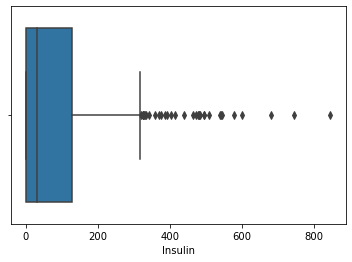

In [10]:
sns.boxplot(x=diabetes['Insulin'])

<AxesSubplot:xlabel='BMI'>

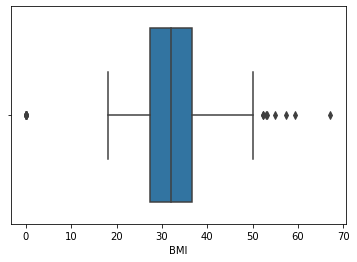

In [11]:
sns.boxplot(x=diabetes['BMI'])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

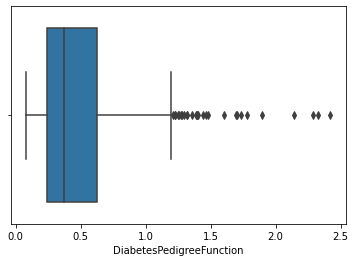

In [12]:
sns.boxplot(x=diabetes['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='Age'>

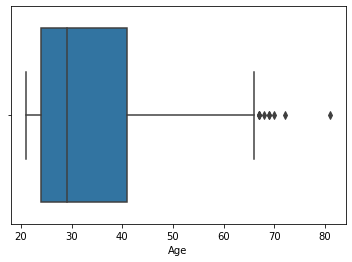

In [13]:
sns.boxplot(x=diabetes['Age'])

In [14]:
#removing the outliers
parameters = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in parameters:#for loop to iterate over all the parameters to remove outliers
    Q1 = diabetes[i].quantile(0.25)
    Q3 = diabetes[i].quantile(0.75)
    IQR = Q3 - Q1
    diabetes[i] = diabetes[i][~((diabetes[i] < (Q1 - 1.5 * IQR)) |(diabetes[i] > (Q3 + 1.5 * IQR)))]


In [15]:
#gathering the info of the data after removing outliers
print(diabetes.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               764 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             723 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   734 non-null    float64
 5   BMI                       749 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       759 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB
None


In [16]:
#droping all the nan values
diabetes.dropna(subset =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'] , inplace=True)
diabetes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               639 non-null    float64
 1   Glucose                   639 non-null    float64
 2   BloodPressure             639 non-null    float64
 3   SkinThickness             639 non-null    float64
 4   Insulin                   639 non-null    float64
 5   BMI                       639 non-null    float64
 6   DiabetesPedigreeFunction  639 non-null    float64
 7   Age                       639 non-null    float64
 8   Outcome                   639 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 49.9 KB


In [17]:
#selecting the features and seperating features and target variables
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
x = diabetes[features]
y = diabetes.iloc[:,8]

In [18]:
#splitting of dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [19]:

#standardizing the training and testing data
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [20]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
#function to calculate euclidean distance
def euclid_dist(X1,X2):
    dist = np.sum((X1 - X2)**2)
    return np.sqrt(dist)

In [22]:
#function of knn predict
def knn_predict(x_train, x_test, y_train, y_test, k):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_pred = []

    for test_point in x_test:
        distances = []

        for train_point in x_train:
            distance = euclid_dist(test_point, train_point)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_pred.append(prediction)
        
    return y_pred


In [23]:
# Make predictions on test dataset
y_pred = knn_predict(x_train, x_test, y_train, y_test, k=20)


In [24]:
print(y_test)
print(y_pred)

196    0
374    0
590    1
660    0
271    0
      ..
124    1
538    0
27     0
257    0
209    1
Name: Outcome, Length: 128, dtype: int64
[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]


In [25]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test,y_pred))

Accuracy: 0.8359375


In [26]:
#finding the best suitable k value
error = []
for i in range(1, 40):
    pred_i = knn_predict(x_train, x_test, y_train, y_test, k=i)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

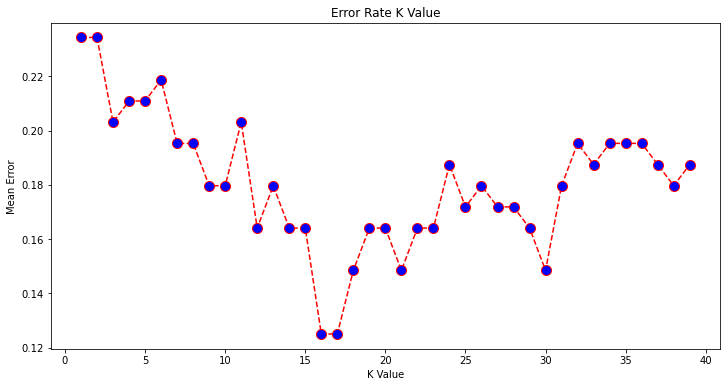

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [28]:
#using the best value of k to train the model and finding accuracy
y_hat_test1 = knn_predict(x_train, x_test, y_train, y_test, k=16)
print('Accuracy:', accuracy_score(y_test,y_pred))

Accuracy: 0.8359375


In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.18840579710144922